In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("C:/Users/sairam/Downloads/datasets/Universities.csv")

In [31]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [32]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [33]:
df_norm=norm_func(df.iloc[:,1:])

In [34]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [35]:
from sklearn.cluster import KMeans

In [36]:
list_k=list(range(2,16))

In [37]:
list_k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [38]:
sse=[]

Text(0, 0.5, 'no.of squares')

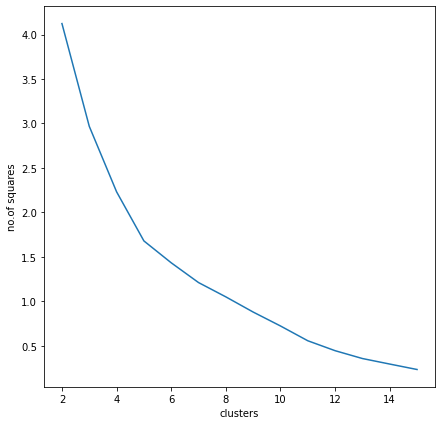

In [39]:
for k in list_k:
    km=KMeans(n_clusters=k)
    km.fit(df_norm)
    sse.append(km.inertia_)
plt.figure(figsize=(7,7))
plt.plot(list_k,sse)
plt.xlabel("clusters")
plt.ylabel("no.of squares")
    

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA(n_components=6)

In [47]:
df_new=pca.fit_transform(df_norm)

In [43]:
var=pca.explained_variance_ratio_

In [44]:
var

array([0.77025511, 0.13343906, 0.04689826, 0.02399584, 0.02102482,
       0.00438691])

In [45]:
pca.components_[0]

array([-0.45681117, -0.44154221,  0.42352638,  0.30543106, -0.34805569,
       -0.45006505])

In [46]:
np.cumsum(np.round(var,decimals=4)*100)

array([ 77.03,  90.37,  95.06,  97.46,  99.56, 100.  ])

In [48]:
newdf=pd.DataFrame(df_new[:,0:3])

In [49]:
newdf

,0,1,2
0,-0.296167,-0.259534,0.052957
1,-0.640645,0.654508,0.167018
2,0.382328,0.397587,0.017023
3,-0.187219,0.007760,0.009586
4,-0.099310,-0.160819,0.035595
5,-0.447241,-0.094331,-0.050321
6,-0.350700,-0.125168,-0.025006
7,-0.101472,-0.225599,-0.081339
8,-0.637145,-0.070472,-0.011926
9,-0.301849,0.517918,-0.226549


In [50]:
model=KMeans(n_clusters=5)

In [51]:
model.fit(newdf)

KMeans(n_clusters=5)

In [52]:
model.labels_

array([2, 3, 1, 2, 2, 0, 0, 2, 0, 3, 0, 2, 2, 4, 0, 4, 0, 4, 1, 2, 1, 2,
       2, 4, 0])

In [53]:
ser=pd.Series(model.labels_)

In [54]:
df['cluster']=ser

In [55]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [57]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [59]:
z=linkage(newdf,method='complete',metric='euclidean')

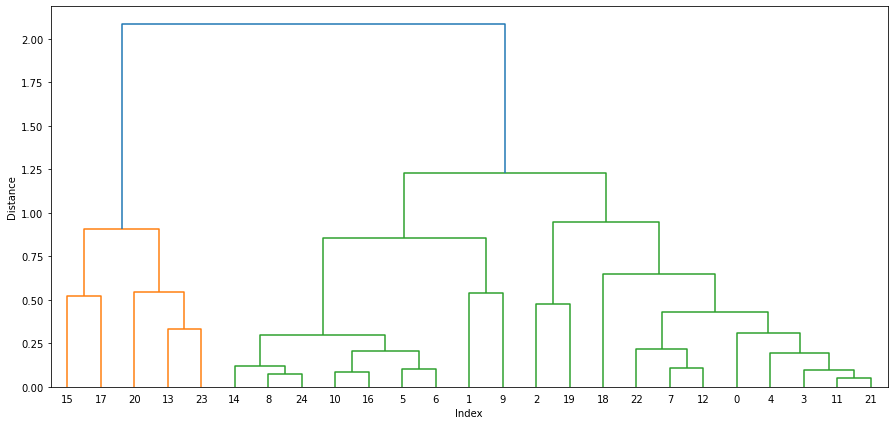

In [60]:
plt.figure(figsize=(15,7))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0)
plt.show()

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [62]:
h_comp=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean')

In [64]:
model1=h_comp.fit(newdf)

In [65]:
model1.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 1, 2], dtype=int64)

In [66]:
ser_u=pd.Series(model1.labels_)

In [67]:
df['cluster_h']=ser_u

In [68]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,cluster_h
0,Brown,1310,89,22,13,22704,94,2,0
1,CalTech,1415,100,25,6,63575,81,3,2
2,CMU,1260,62,59,9,25026,72,1,0
3,Columbia,1310,76,24,12,31510,88,2,0
4,Cornell,1280,83,33,13,21864,90,2,0
5,Dartmouth,1340,89,23,10,32162,95,0,2
6,Duke,1315,90,30,12,31585,95,0,2
7,Georgetown,1255,74,24,12,20126,92,2,0
8,Harvard,1400,91,14,11,39525,97,0,2
9,JohnsHopkins,1305,75,44,7,58691,87,3,2
